TODO
- I have the code created to get the lat and long for a given node in the network. Now determine the network properties about each node that we want to provide to Lauren Orr and loop through (takes a long time) and create data structures to hold them
- Debug the plotting routing (need to install BaseMap capabilities)

This example uses what might be the most up to date and granular synthetic network model of the power grid

[U.S. Test System with High Spatial and Temporal Resolution for Renewable Integration Studies](https://zenodo.org/record/4538590)

from the [paper on the model](https://arxiv.org/pdf/2002.06155.pdf): 
    As a starting point for the network topology, the TAMU
network was chosen for its high spatial resolution; it consists
of 82,000 buses, 104,121 branches, and 13,419 generators
in a fictitious configuration that is ‘realistic’ and represen-
tative of true infrastructure but not contain any confidential
information. This network is then updated with more recent
generator capacities (described in Sections II-B to II-D),
HVDC transmission lines (described in Section II-E), and
updated transmission capacity (described in Section IV-A).
The final network is shown in Figure 1


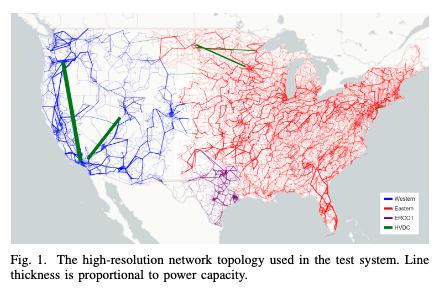



In [149]:
import pandas as pd
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [150]:
direc_grid = '/Users/ryanmc/Documents/NSF_CHESS/data/synthetic_grids/USATestSystem/'


In [151]:
# Read in data

bus_to_sub = pd.read_csv(os.path.join(direc_grid,'base_grid/bus2sub.csv'))

sub = pd.read_csv(os.path.join(direc_grid,'base_grid/sub.csv'))

node = pd.read_csv(os.path.join(direc_grid,'base_grid/bus.csv'))

from_to = pd.read_csv(os.path.join(direc_grid,'base_grid/branch.csv'))


In [152]:
b_tmp = node['bus_id'].values[0]
b_idx = np.argwhere(from_to['from_bus_id'].values == b_tmp)
b_idx
for b2 in b_idx:
    print('edge = {},{}'.format(from_to['from_bus_id'].values[b2][0],
                                from_to['to_bus_id'].values[b2][0]
                               ))

edge = 1,4
edge = 1,5
edge = 1,6


In [153]:
G = nx.DiGraph()

for b in node['bus_id'].values:
    G.add_node(b)
    b_idx = np.argwhere(from_to['from_bus_id'].values == b)
    for b2 in b_idx:
        G.add_edge(from_to['from_bus_id'].values[b2][0],from_to['to_bus_id'].values[b2][0])

        

In [39]:
print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [155]:
G.number_of_nodes()
# G.number_of_edges()

82071

In [41]:
# nx.draw(G)
nx.average_clustering(G) 

0.008253035643702371

In [ ]:
print(nx.clustering(G))

{1: 0, 4: 0, 5: 0, 6: 0, 2: 0, 3: 0, 874: 0.047619047619047616, 7: 0.05, 9: 0, 29: 0.08333333333333333, 477: 0, 8: 0, 979: 0, 10: 0, 28: 0, 11: 0, 982: 0, 12: 0, 34: 0, 13: 0, 14: 0, 51: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0.16666666666666666, 20: 0, 886: 0.08333333333333333, 21: 0, 23: 0.08333333333333333, 22: 0, 26: 0.16666666666666666, 24: 0, 25: 0, 46: 0, 27: 0, 30: 0, 231: 0, 888: 0, 31: 0, 32: 0, 35: 0, 33: 0, 36: 0, 37: 0, 616: 0, 38: 0, 248: 0, 39: 0, 40: 0, 1077: 0, 41: 0, 44: 0, 42: 0, 43: 0, 49: 0, 1137: 0, 45: 0, 172: 0, 191: 0, 1173: 0, 47: 0, 48: 0, 50: 0, 1078: 0, 456: 0, 52: 0, 53: 0, 54: 0, 55: 0, 111: 0, 56: 0, 104: 0, 57: 0.16666666666666666, 61: 0.5, 87: 0.16666666666666666, 58: 0, 60: 0, 73: 0, 59: 0, 62: 0, 1050: 0, 63: 0, 732: 0, 64: 0, 65: 0, 119: 0, 66: 0, 112: 0, 67: 0, 1018: 0, 68: 0.5, 1176: 0.06666666666666667, 69: 0.05, 70: 0, 71: 0, 72: 0, 74: 0, 75: 0, 76: 0, 125: 0, 77: 0.5, 78: 0.08333333333333333, 81: 0.08333333333333333, 79: 0, 80: 0, 82: 0, 83: 0, 89

In [47]:

for key, value in nx.clustering(G).items():
    print(key, '->', value)

1 -> 0
4 -> 0
5 -> 0
6 -> 0
2 -> 0
3 -> 0
874 -> 0.047619047619047616
7 -> 0.05
9 -> 0
29 -> 0.08333333333333333
477 -> 0
8 -> 0
979 -> 0
10 -> 0
28 -> 0
11 -> 0
982 -> 0
12 -> 0
34 -> 0
13 -> 0
14 -> 0
51 -> 0
15 -> 0
16 -> 0
17 -> 0
18 -> 0
19 -> 0.16666666666666666
20 -> 0
886 -> 0.08333333333333333
21 -> 0
23 -> 0.08333333333333333
22 -> 0
26 -> 0.16666666666666666
24 -> 0
25 -> 0
46 -> 0
27 -> 0
30 -> 0
231 -> 0
888 -> 0
31 -> 0
32 -> 0
35 -> 0
33 -> 0
36 -> 0
37 -> 0
616 -> 0
38 -> 0
248 -> 0
39 -> 0
40 -> 0
1077 -> 0
41 -> 0
44 -> 0
42 -> 0
43 -> 0
49 -> 0
1137 -> 0
45 -> 0
172 -> 0
191 -> 0
1173 -> 0
47 -> 0
48 -> 0
50 -> 0
1078 -> 0
456 -> 0
52 -> 0
53 -> 0
54 -> 0
55 -> 0
111 -> 0
56 -> 0
104 -> 0
57 -> 0.16666666666666666
61 -> 0.5
87 -> 0.16666666666666666
58 -> 0
60 -> 0
73 -> 0
59 -> 0
62 -> 0
1050 -> 0
63 -> 0
732 -> 0
64 -> 0
65 -> 0
119 -> 0
66 -> 0
112 -> 0
67 -> 0
1018 -> 0
68 -> 0.5
1176 -> 0.06666666666666667
69 -> 0.05
70 -> 0
71 -> 0
72 -> 0
74 -> 0
75 -> 0
76 ->

38687 -> 0
38688 -> 0
38689 -> 0
38690 -> 0
38692 -> 0
38691 -> 0
38693 -> 0
39643 -> 0
38694 -> 0
38696 -> 0
38695 -> 0
39457 -> 0
39620 -> 0
48541 -> 0
39588 -> 0
38697 -> 0
38698 -> 0
38699 -> 0
38700 -> 0
38967 -> 0
38702 -> 0
38703 -> 0
38704 -> 0
38706 -> 0
38705 -> 0
39909 -> 0
38707 -> 0
38880 -> 0
39873 -> 0
38708 -> 0
38874 -> 0
39180 -> 0
40126 -> 0
38709 -> 0
38710 -> 0
40132 -> 0
38711 -> 0
38712 -> 0
38713 -> 0
39483 -> 0
38715 -> 0
38828 -> 0
38716 -> 0
38993 -> 0
38717 -> 0
38718 -> 0
38719 -> 0
38723 -> 0
38728 -> 0
38720 -> 0
38727 -> 0
46786 -> 0
48846 -> 0
38721 -> 0
48424 -> 0
38722 -> 0
38724 -> 0
47808 -> 0
38725 -> 0
38726 -> 0
38729 -> 0
48107 -> 0
38730 -> 0
38732 -> 0
38736 -> 0
38733 -> 0
38734 -> 0
38735 -> 0
38743 -> 0
38737 -> 0
38997 -> 0
38740 -> 0
38890 -> 0
38741 -> 0
38744 -> 0
38745 -> 0
39634 -> 0
38746 -> 0
39631 -> 0
38747 -> 0
38754 -> 0
38756 -> 0
38748 -> 0
38755 -> 0
38749 -> 0
38750 -> 0
38751 -> 0
39614 -> 0
38752 -> 0
38753 -> 0
38757 -> 0

2077037 -> 0
2077039 -> 0
2077208 -> 0
2077041 -> 0
2077042 -> 0
2077049 -> 0
2077045 -> 0
2077046 -> 0
2077047 -> 0
2077048 -> 0
2077052 -> 0
2077267 -> 0
2077050 -> 0
2077201 -> 0
2077051 -> 0
2077053 -> 0
2077230 -> 0
2077055 -> 0
2077064 -> 0
2077083 -> 0
2077054 -> 0
2077058 -> 0
2077056 -> 0.5
2077093 -> 0.16666666666666666
2077203 -> 0.16666666666666666
2077057 -> 0
2077059 -> 0
2077060 -> 0
2077061 -> 0
2077062 -> 0
2077078 -> 0
2077091 -> 0
2077063 -> 0
2077066 -> 0
2077067 -> 0
2077068 -> 0
2077069 -> 0
2077086 -> 0
2077292 -> 0
2077096 -> 0
2077070 -> 0
2077071 -> 0
2077269 -> 0
2077072 -> 0
2077075 -> 0
2077076 -> 0
2077073 -> 0
2077074 -> 0
2077077 -> 0
2077290 -> 0
2077079 -> 0
2077080 -> 0
2077081 -> 0
2077082 -> 0
2077084 -> 0
2077085 -> 0
2077231 -> 0
2077087 -> 0
2077090 -> 0
2077092 -> 0
2077088 -> 0
2077089 -> 0
2077094 -> 0
2077281 -> 0.03333333333333333
2077095 -> 0
2077097 -> 0
2077098 -> 0
2077271 -> 0
2077099 -> 0.5
2077101 -> 0.16666666666666666
2077100 -> 0
2

In [137]:
for n in graph.nodes:
    graph.nodes[n][att1]

NameError: name 'att1' is not defined

In [143]:
import networkx as nx

# Create a sample graph
graph = nx.Graph()
graph.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Loop through existing nodes and add attributes
for node in graph.nodes:
    graph.add_node(node, lat=1., lon='value2')

# Access node attributes
for node in graph.nodes:
    print(f"Node: {node}")
    print(f": {graph.nodes[node]['lat']}")
    print(f": {graph.nodes[node]['lon']}")
    print("--------------------")


Node: 1
: 1.0
: value2
--------------------
Node: 2
: 1.0
: value2
--------------------
Node: 3
: 1.0
: value2
--------------------
Node: 4
: 1.0
: value2
--------------------


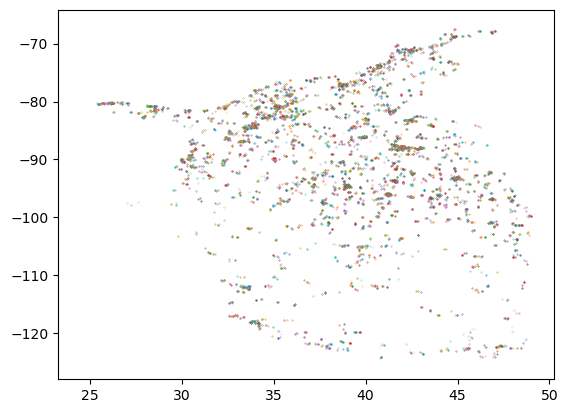

In [64]:
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# map = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# # Draw coastlines and state boundaries
# map.drawcoastlines()
# map.drawcountries()
# map.drawstates()

for key, value in nx.clustering(G).items():
    
    # Get the lat, long of the node
    sub_idx =  bus_to_sub['sub_id'].values[np.argwhere(bus_to_sub['bus_id'].values==key)[0]]
    lat = sub['lat'].values[sub['sub_id'].values==sub_idx]
    lon = sub['lon'].values[sub['sub_id'].values==sub_idx]
    
#     print('sub = {}, lat,long = {},{}'.format(sub_idx, lat, lon))
#     # Convert latitude and longitude coordinates to x, y coordinates
#     x, y = map(lon, lat)

#     # Plot scatter points on the map with size defined by clustering of that node
#     map.scatter(x, y, value,marker='o', color='red')

    # Show the map
    plt.scatter(lat, lon, value,)#marker='o')
plt.show()



In [156]:
# Compile node-level details
#  Note: nodes are labeled by 'bus'

import time

start_time = time.time()

node_list = list(G.nodes)

node_lats = []
node_lons = []
node_degree = []
# node_betweenness_centrality = []
# node_closeness_centrality = []
# node_eigenvector_centrality = []
node_clustering = []

for n in G.nodes:
#     print(n)
    
    if np.mod(n,1000)==0:
        print('reached node = {}'.format(n))
        print('percentage complete = {}'.format( (node_list[n]/len(node_list))*100 ))
        end_time = time.time()
        print('time for this portion = {} seconds'.format(end_time - start_time))
        start_time = time.time()
        
    
    # Get latitude and longitude of the node
    sub_idx = bus_to_sub['sub_id'].values[np.argwhere(bus_to_sub['bus_id'].values==n)[0]]
    node_lats.append(sub['lat'].values[sub['sub_id'].values==sub_idx][0])
    node_lons.append(sub['lon'].values[sub['sub_id'].values==sub_idx][0])
    
    # add lats and longs as attributes to the node
    G.add_node(n, lat=node_lats[-1], lon=node_lons[-1])
    
    # Get network node-level details
    node_degree.append(nx.degree_centrality(G)[n])
#     node_betweenness_centrality.append(nx.betweenness_centrality(G)[n])
#     node_closeness_centrality.append(nx.closeness_centrality(G)[n])
#     node_eigenvector_centrality.append(nx.eigenvector_centrality(G)[n])
    node_clustering.append(nx.clustering(G)[n])
    
    


reached node = 1000
percentage complete = 1.096611470555982
time for this portion = 386.1162350177765 seconds
reached node = 2000
percentage complete = 2.3893945486225343
time for this portion = 361.15785098075867 seconds
reached node = 3000
percentage complete = 3.511593620158156
time for this portion = 361.30111503601074 seconds
reached node = 4000
percentage complete = 4.608205090714137
time for this portion = 59.581838846206665 seconds
reached node = 5000
percentage complete = 6.077664461259154
time for this portion = 676.6029858589172 seconds
reached node = 6000
percentage complete = 7.1572175311620425
time for this portion = 368.02624320983887 seconds
reached node = 7000
percentage complete = 8.312314946814343
time for this portion = 353.78939270973206 seconds
reached node = 8000
percentage complete = 9.510058364099377
time for this portion = 399.9043319225311 seconds
reached node = 9000
percentage complete = 10.91493950360054
time for this portion = 529.1099710464478 seconds
rea

IndexError: list index out of range

In [183]:
# identified where the code above broke and picking up there
for n2 in node_list[71123:]:
    
#     G.nodes[n2]
    
    if np.mod(n,1000)==0:
        print('reached node = {}'.format(n))
        
    # Get latitude and longitude of the node
    sub_idx = bus_to_sub['sub_id'].values[np.argwhere(bus_to_sub['bus_id'].values==n2)[0]]
    node_lats.append(sub['lat'].values[sub['sub_id'].values==sub_idx][0])
    node_lons.append(sub['lon'].values[sub['sub_id'].values==sub_idx][0])
    
    # add lats and longs as attributes to the node
    G.add_node(n2, lat=node_lats[-1], lon=node_lons[-1])
    
    # Get network node-level details
    node_degree.append(nx.degree_centrality(G)[n2])
#     node_betweenness_centrality.append(nx.betweenness_centrality(G)[n])
#     node_closeness_centrality.append(nx.closeness_centrality(G)[n])
#     node_eigenvector_centrality.append(nx.eigenvector_centrality(G)[n])
    node_clustering.append(nx.clustering(G)[n2])

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached node = 2011000
reached nod

In [200]:
G.nodes[55830]

{'lat': 38.1942, 'lon': -90.8374}

In [182]:
for n2 in node_list[71123:]:
    print(n2)
    print(G.nodes[n2])

2010999
{'lat': 46.8016, 'lon': -122.31}
2011000
{}
2011005
{}
2011006
{}
2013631
{}
2013666
{}
2011004
{}
2013484
{}
2011003
{}
2011007
{}
2011008
{}
2011009
{}
2011014
{}
2011015
{}
2011016
{}
2011017
{}
2011018
{}
2011019
{}
2011020
{}
2011021
{}
2011022
{}
2011023
{}
2011024
{}
2011025
{}
2011038
{}
2011012
{}
2011027
{}
2011030
{}
2011031
{}
2011032
{}
2011033
{}
2011029
{}
2011035
{}
2011036
{}
2011041
{}
2011042
{}
2011043
{}
2011044
{}
2011045
{}
2011046
{}
2011039
{}
2011040
{}
2011050
{}
2013302
{}
2013648
{}
2013123
{}
2013155
{}
2011051
{}
2011052
{}
2011053
{}
2013427
{}
2011054
{}
2011059
{}
2011060
{}
2011061
{}
2011058
{}
2011063
{}
2011065
{}
2011066
{}
2011064
{}
2011069
{}
2013467
{}
2011072
{}
2011073
{}
2011077
{}
2011078
{}
2011079
{}
2011080
{}
2011081
{}
2011082
{}
2011076
{}
2013000
{}
2013007
{}
2013001
{}
2013002
{}
2013003
{}
2013005
{}
2013004
{}
2013006
{}
2020006
{}
2020008
{}
2013008
{}
2013010
{}
2013016
{}
2013009
{}
2013011
{}
2013012
{}
2013013
{}
20

In [201]:
# Next: save the graph as gml object and post to notes

import pickle

save_dir = '/Users/ryanmc/Documents/NSF_CHESS/data/synthetic_grids/USATestSystem/my_saved_data'

# save graph object to graph.pickle file
pickle.dump(G, open(os.path.join(save_dir,'graph.pickle'), 'wb'))

# # load graph object from graph.pickle file
# G = pickle.load(open('graph.pickle', 'rb'))